In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)
from microstates import Microstates
from binding import Sweep
    
import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [26]:
import multiprocessing as mp

In [2]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043

alpha = [.96*(a0+c0), a0] 
beta = [.8*(b0+c0), b0] 
gamma = [0, .7*c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)
print(alpha[0])
print(beta[0])

-16.318080000000002
-10.304


# parallelization

In [58]:
import multiprocessing as mp

def func(output):
    alist = [0]
    for i, x in enumerate(range(5000000)):
        alist.append(x-alist[i-1])
    output.put(0)
    
def sfunc():
    alist = [0]
    for i, x in enumerate(range(5000000)):
        alist.append(x-alist[i-1])

In [62]:
st = time.time()
[sfunc() for _ in range(5)]
print(time.time()-st)

8.842587947845459


In [91]:
95/70

1.3571428571428572

In [92]:
41/30.43

1.3473545842918173

In [89]:
43.48-13.04

30.439999999999998

In [90]:
21.74/30.43

0.7144265527440026

In [78]:
reacted = ((1000/46) *.7/.5)*.7



(reacted * (1-.714) )

6.093043478260871

In [79]:
21.7/27.8

0.7805755395683452

In [65]:
.5/.7

0.7142857142857143

In [63]:
st = time.time()

# Define an output queue
output = mp.Queue()

# Setup a list of processes that we want to run
processes = [mp.Process(target=func, args=(output,)) for _ in range(5)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]

print(time.time()-st)

5.890948057174683


In [38]:
results

[0, 10, 20, 30]

In [3]:
Ns = 5
density = 1

In [4]:
#%%prun -D ../profiling/light.prof
start = time()
microstates = Microstates(Ns=Ns, params=params, ets=(0, ))
rsweep = Sweep(cmin=1, cmax=1000, density=density)
rsweep.set_occupancies(microstates, method='base')
print(time()-start)

0.0042438507080078125


In [5]:
#%%prun -D ../profiling/light.prof
start = time()
microstates = Microstates(Ns=Ns, params=params, ets=(0, ))
tsweep = Sweep(cmin=1, cmax=1000, density=density)
tsweep.set_occupancies(microstates, method='test')
print(time()-start)

TypeError: 'NoneType' object is not subscriptable

Exception ignored in: 'partitions.cTest.set_occupancy'
TypeError: 'NoneType' object is not subscriptable


TypeError: 'NoneType' object is not subscriptable

0.014687061309814453


Exception ignored in: 'partitions.cTest.set_occupancy'
TypeError: 'NoneType' object is not subscriptable


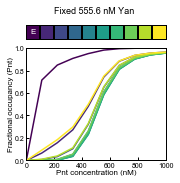

In [8]:
fixed = 5
fig = rsweep.plot_contours(species='Pnt', variable='Pnt', fixed=fixed, figsize=(2.5, 2.5))

In [22]:
microstates = Microstates(Ns=4, params=params, ets=(0,))
hsweep = Sweep(cmin=500, cmax=600, density=1)
hsweep.set_occupancies(microstates, method='base')

In [23]:
microstates = Microstates(Ns=8, params=params, ets=(0,4))
fsweep = Sweep(cmin=500, cmax=600, density=1)
fsweep.set_occupancies(microstates, method='base')

In [24]:
hsweep.occupancies.shape

(4, 1, 3)

In [25]:
fsweep.occupancies.shape

(8, 1, 3)

In [47]:
sp = 1
h = hsweep.occupancies[:, 0, sp]
h

array([0.99963351, 0.93745347, 0.93649409, 0.93758851])

In [48]:
f = fsweep.occupancies[:, 0, sp]
f

array([0.99935679, 0.93431012, 0.93193858, 0.93233376, 0.99403104,
       0.93253375, 0.93226234, 0.93474784])

In [44]:
x = np.dot(h.T, np.dot(h, h.T))
y = np.dot(h.T, np.dot(h, h.T))
z = np.vstack((x,y))
z/z.sum(axis=0)

array([[0.02154796, 0.02156995, 0.02156998, 0.02156995],
       [0.47678008, 0.47675657, 0.47675654, 0.47675657],
       [0.00167196, 0.00167348, 0.00167348, 0.00167348],
       [0.02154796, 0.02156995, 0.02156998, 0.02156995],
       [0.47678008, 0.47675657, 0.47675654, 0.47675657],
       [0.00167196, 0.00167348, 0.00167348, 0.00167348]])

array([[0.16418589, 0.15457419, 0.15441679, 0.15459634],
       [3.63285274, 3.41652428, 3.41304088, 3.41701459],
       [0.01273961, 0.01199248, 0.01198027, 0.0119942 ]])

In [7]:
x = tsweep.occupancies.flatten()
y = rsweep.occupancies.flatten()
np.allclose(x, y, atol=1e-4)

False

In [8]:
y.max()

1.0

In [9]:
x.max()

24.90144139080177

In [10]:
for xx, yy in zip(x, y):
    if xx != yy:
        print(xx, yy)

-36.444383353000596 0.00014810851655822077
37.444383353000596 0.9998518914834418
-6.446993504939086 6.895380277882612e-05
7.446993504939086 0.9999310461972212
-3.0165457335273373 4.493788344694938e-05
4.016545733527337 0.999955062116553
-1.8971382026677888 3.332953616397294e-05
2.8971382026677888 0.999966670463836
-1.3665282752879082 2.6487331604596598e-05
2.366528275287908 0.9999735126683954
-1.0622694088036604 2.197590767016866e-05
2.0622694088036604 0.9999780240923298
-0.8665967409262909 1.877762961710605e-05
1.866596740926291 0.9999812223703829
-0.7307758246484701 1.639200798242424e-05
1.7307758246484701 0.9999836079920176
-0.6312406466930183 1.4544223394197253e-05
1.6312406466930183 0.9999854557766058
-8.196821413108957e-05 1.1661701270204716e-05
1.000081968214131 0.9999883382987298
-0.29102418945167785 1.1596412227588004e-05
0.991688732636295 0.9943898176349162
0.2993354568153829 0.0055985859528561955
-0.8594304521162774 1.0379008058669648e-05
0.8661064101375885 0.889997678476807

-0.01544212030649339 0.02049440092463395
0.36400798035529136 0.3653183995356432
0.6514341399512021 0.6141871995397228
-0.035096831472328116 0.010648276030084225
0.18889490762274017 0.18980848337540726
0.846201923849588 0.7995432405945085
-0.043369009002388825 0.006211138236888347
0.11011629121202449 0.11071526746753926
0.9332527177903644 0.8830735942955724
-0.04673788410685775 0.004148898749411711
0.07353327856933049 0.07395527473683615
0.9732046055375273 0.9218958265137521
0.044649712406181874 0.044662129791945615
0.9553502875938181 0.9553378702080544
0.04451655882078387 0.04465394740645512
0.9552841624165371 0.9551628462534704
0.000199278762678985 0.00018320634007446755
0.044501685951104375 0.044620431468462285
0.9545105783345955 0.9544459291445666
0.0009877357143001548 0.0009336393869711048
0.04412461649356858 0.044437441520496446
0.9505740360498399 0.9505317130592214
0.005301347456591526 0.00503084542028217
0.04207058215374604 0.04344931197811308
0.9293468536166077 0.92939529217786

1.0191374577945627 0.9575844637451233
-0.06164169536628017 0.000983214212557204
0.010435265559270442 0.010515640165125725
1.0512064298070096 0.9885011456223171
-0.0617896382766947 0.0003496219220177066
0.003713545154708581 0.003739264830097199
1.0580760931219861 0.9959111132478851
-0.06099960682832961 0.00015553921396416204
0.001654053697132373 0.0016635178617976226
1.0593455531311973 0.9981809429242382
-0.05992636881004332 8.180680635305748e-05
0.0008713007580210808 0.0008749374541357517
1.0590550680520223 0.9990432557395111
0.06551711403283511 0.06552984350009472
0.9344828859671649 0.9344701564999053
0.06538709845737756 0.06549751938853687
0.9341122301479526 0.9340092074733132
0.0005006713946698363 0.0004932731381499013
0.06478727582348909 0.06509332248702593
0.9283434816578128 0.9282452696779984
0.006869242518698189 0.006661407834975724
0.058346920356899146 0.06106925646326644
0.8707559691683167 0.8708611923455418
0.07089711047478416 0.06806955119119175
0.027167287439941346 0.042255

0.1739674134304907 0.17427180983109478
0.829621261866955 0.8187448565986628
0.033870745902368715 0.033874827833301646
0.9661292540976313 0.9661251721666984
0.033853547674012385 0.03387065996696936
0.9660234078075817 0.966006302763802
0.00012304451840591455 0.00012303726922867892
0.03383889877150259 0.03385655942751509
0.9656214661114164 0.9656041491001173
0.000539635117080962 0.0005392914723676241
0.03377576753044387 0.03380390635124941
0.9641255159154474 0.9641024599201754
0.0020987165541087875 0.0020936337285751483
0.03353775013318827 0.03360832764992727
0.9585554360866176 0.9585244682829624
0.007906813780194123 0.007867204067110316
0.03271640712088231 0.03294808730305754
0.9397188242908296 0.9396941196261442
0.027564768588288092 0.027357793070798265
0.030305565793363853 0.031053399741017174
0.8856109763029311 0.8856567867669958
0.08408345790370504 0.0832898134919871
0.024756574915708818 0.026777408695722427
0.7634684798133153 0.7637036183177419
0.2117749452709758 0.2095189729865357


0.03385534576832738 0.033860287319263827
0.9657153811145683 0.9657104702324162
0.00042927311710423634 0.0004292424483200058
0.03381770772091852 0.03382588405992726
0.9647366186481989 0.9647292739575339
0.0014456736308825421 0.001444841982538812
0.03367622223284772 0.03369707437684821
0.9610672406162752 0.9610555644477752
0.005256537150877081 0.005247361175376648
0.03315952512753739 0.03322918329791058
0.9477219687442374 0.9477111025534578
0.019118506128225212 0.019059714148631605
0.031552207601611704 0.03178082651506253
0.9063784274634129 0.9064033222404987
0.06206936493497537 0.06181585124443874
0.027671893001115833 0.02829746666924593
0.8069230990099016 0.8070563485109459
0.1654050079889826 0.16464618481980825
0.021074626862141677 0.022391170417320527
0.6383624567957543 0.638606149705674
0.340562916342104 0.33900267987700555
0.013606591844568916 0.01572018329653413
0.44814670985687355 0.4483466268428256
0.5382466982985575 0.5359331898606402
0.03022350136810703 0.030224719983574122
0.

In [15]:
y

array([1.        , 0.        , 0.        , ..., 0.02314131, 0.74250054,
       0.23435815])

In [ ]:
r = rsweep.occupancies.flatten()

In [ ]:
for tt,rr in zip(t, r):
    print(tt,rr)

In [ ]:
member s

16203



In [ ]:
nsweep = Sweep(cmin=0, cmax=1000, density=density)
nsweep.set_occupancies(microstates, method='base')

rsweep = Sweep(cmin=0, cmax=1000, density=density)
rsweep.set_occupancies(microstates, method='recursive')

isweep = Sweep(cmin=0, cmax=1000, density=density)
isweep.set_occupancies(microstates, method='iterative')

In [ ]:
fig = nsweep.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))
fig = rsweep.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))
fig = isweep.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))

In [ ]:
fig, cmap, norm = asweep.create_figure(variable='Pnt', fixed=2, figsize=(3, 3))
asweep.add_contour(fig.axes[1], species='Pnt', variable='Pnt', fixed=2)

In [ ]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=6, figsize=(2.5, 2.5))

In [ ]:
(3**8) * 13 / 3600

In [ ]:
cms = microstates.get_c_microstates()

In [ ]:
a = cms.get_a()
a.shape

In [ ]:
self.a.data.as_uints[(index-1)*(self.Nm) +  index] = 1

In [ ]:
masks = microstates.get_masks()

In [ ]:
masks.shape

In [ ]:
old = masks.nonzero()


In [ ]:
new = masks[:, :-1, :].nonzero()


In [ ]:
new[0].size/old[0].size

In [ ]:
microstates.Nm * microstates.Ns

In [ ]:
b, Ns = microstates.b, microstates.Ns

(b-1)*Ns*(b**(Ns-1))

In [ ]:
microstates.Ns

In [ ]:
microstates.

In [ ]:
Ns=11
fixed = 2
cmax = 500

# create figure
microstates = Microstates(Ns=Ns, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=cmax, density=9)
sweep.set_occupancies(microstates, method='c')
fig, cmap, norm = sweep.create_figure(fixed=fixed)
ax = fig.axes[1]

# add contours
for ets_site in range(1, Ns):
    microstates = Microstates(Ns=Ns, params=params, ets=(0, ets_site))
    sweep = ConcentrationSweep(cmin=0, cmax=cmax, density=11)
    sweep.set_occupancies(microstates, method='c')
    ax = sweep.add_contour(ax, fixed=fixed, color=cmap(norm(ets_site)))

In [ ]:
norm(10)

In [ ]:
fig = sweep.plot_overall_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))

In [ ]:
color = cmap(norm(proximity[i]))

In [ ]:
fig, ax = plt.subplots()


data = (sweep.occupancies[:, :, sweep.names['Pnt']].mean(axis=0).reshape(*(sweep.density,)*2))[:, fixed]
ax.plot(sweep.C*1e9, data)


In [ ]:
data

In [ ]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

In [ ]:
# plot contributions

# create figure

figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)
#fig.savefig('unequal_contributions.pdf', dpi=400, format='pdf')

In [ ]:
# plot colorbar
cmap = plt.cm.PiYG
fig, ax_cbar = plt.subplots(figsize=(2, .2))
norm = Normalize(0, 0.5)
cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_ticks([])
#fig.savefig('piyg_colorbar.pdf', dpi=400, format='pdf')
#ax_cbar.xaxis.set_ticks_position('top')
#ax_cbar.tick_params(labelsize=8, pad=0)
#label = 'Relative Contribution'
# if name is not None:
#     label = label + ' ({:s})'.format(name)
#cbar.set_label(label, fontsize=8)
#cbar.set_ticks([0, .5])
#cbar.set_ticklabels(['Free binding', 'Polymerization'])
#ax_cbar.tick_params(pad=3)

In [ ]:
7/8

In [ ]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0, a0] 
beta = [b0, b0] 
gamma = [c0, c0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [ ]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=2, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

In [ ]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal_poly.pdf', dpi=400, format='pdf')

In [ ]:
fig0 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=0, figsize=(2.5, 2.5))
fig1 = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig0.savefig('no_competition.pdf', dpi=400, format='pdf')
#fig1.savefig('with_competition.pdf', dpi=400, format='pdf')

In [ ]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

In [ ]:
# plot contributions

# create figure
figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)

# # add colorbar
# ax_cbar = plt.subplot(gs[1])
# norm = Normalize(0, 0.5)
# cbar = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')
# ax_cbar.xaxis.set_ticks_position('top')
# ax_cbar.tick_params(labelsize=8, pad=0)
# label = 'Relative Contribution'
# # if name is not None:
# #     label = label + ' ({:s})'.format(name)
# cbar.set_label(label, fontsize=8)
# cbar.set_ticks([0, .5])
# cbar.set_ticklabels(['Free binding', 'Polymerization'])
# ax_cbar.tick_params(pad=3)

#fig.savefig('equal_poly_contributions.pdf', dpi=400, format='pdf')

In [ ]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0+c0, a0+c0] 
beta = [b0+c0, b0+c0] 
gamma = [0, 0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)
R, T = 1.987204118*1E-3, 300  # Kcal/mol/K

In [ ]:
#%%prun -D runtime.prof
start = time()
microstates = Microstates(Ns=12, params=params, ets=(0, ))
sweep = ConcentrationSweep(cmin=0, cmax=100, density=25)
sweep.set_occupancies(microstates, method='c')
print(time()-start)

In [ ]:
fig = sweep.plot_overall_occupancy(species='Pnt', figsize=(2, 2), cmap=plt.cm.PiYG)
#fig.savefig('equal.pdf', dpi=400, format='pdf')

In [ ]:
fig = sweep.plot_overall_occupancy(species='total', figsize=(2, 2), cmap=plt.cm.PiYG)

In [ ]:
fig = sweep.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))
#fig.savefig('equal_contours.pdf', dpi=400, format='pdf')

In [ ]:
from partitions import get_ternary_repr

In [ ]:
n = 2

for k in range(3**n):
    print(k, list(get_ternary_repr(k)[1]))

In [ ]:
# qiao 2005 - TEL inter-sam domain Kd=2 nM , yan inter-sam domain Kd= 11 uM

Mae inhibits Pointed‐P2 transcriptional activity by blocking its MAPK docking site

In [ ]:
R = 1.987204118*1E-3 
T = 300

In [ ]:
Kd = 11 * 1e-6
dG = R*T*np.log(Kd)
dG

In [ ]:
 R*T*np.log(.85 * 1e-9)

In [ ]:
get_free_energy = lambda Kd: R*T*np.log(Kd)

In [ ]:
Kd = 11 * 1e-6

get_free_energy(Kd)

In [ ]:
# affinity of 27 bp oligonucleotude for ETS1,  Kd = 2.5 +- 0.5  * 1e-11 M
dG_specific = get_free_energy(2.5*1e-11)

# affinity of ETS1 for 9 bp randomly-chosen non-specific oligonucleotide, Kd ~ 10 uM
dG_non_specific9 = get_free_energy(1e-5)

# affinity of ETS1 for 15 bp randomly-chosen non-specific oligonucleotide, Kd < 10 uM
dG_non_specific15 = get_free_energy(1e-6)

In [ ]:
print('Specific', dG_specific)
print('Non-specific, 9b', dG_non_specific9)
print('Non-specific, 15b', dG_non_specific15)

In [ ]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))

for n in range(1, 5):
    ax.plot(x, hill(x, n), '-')

ax.set_xlabel('Ligand Concentration')
ax.set_ylabel('Occupancy')

In [ ]:
from matplotlib.colors import Normalize

def plot_coverage(xc, tc, ax, cmap=plt.cm.Greens):
    
    # apply transparency
    norm = Normalize(0, 1)
    colors = cmap(norm(xc))
    colors[:, :, -1] = tc**2
        
    bg = np.empty(xc.shape + (3,), dtype=np.uint8)
    bg.fill(70)
    ax.imshow(bg)
    
    # show
    ax.imshow(colors)
    ax.invert_yaxis()
    ax.set_xlabel('Pnt Concentration')
    ax.set_ylabel('Yan Concentration')

def hill(x, n=1, km=10):
    return (x**n) / ((x**n) + (km**n))
    
def competitive(x, y, n=(1, 1), km=(0.1, 0.1)):
    x_coverage = (km[0]*x)**n[0] / (  1 + ((km[0]*x)**n[0]) + ((km[1]*y)**n[1]) )
    total_coverage = 1 - (1 / (  1 + ((km[0]*x)**n[0]) + ((km[1]*y)**n[1]) ))
    return x_coverage, total_coverage

In [ ]:
x, y = np.arange(100), np.arange(100)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(4, 2))
for n in range(3, 4):
    ax.plot(xx[0], hill(xx[0], n, km=20), 'm')
    #ax.plot(xx[0], competitive(xx, yy, (n, n))[0][0], '--r')

ax.set_ylim(0, 1)
    
ax.set_xlabel('Yan Concentration')
ax.set_ylabel('Yan occupancy')

In [ ]:
x, y = np.arange(100), np.arange(100)
xx, yy = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))

for i, ax in enumerate(axes.flatten()):
    n = 2**i
    xc, tc = competitive(xx, yy, n=(n, n), km=(1, 1))
    plot_coverage(xc, tc, ax, cmap=plt.cm.PiYG, )
    ax.set_title('Yan hill coefficient = {:d}\nPnt hill coefficient = {:d}'.format(n, n))
plt.tight_layout()

In [ ]:
scale = 10
x, y = np.linspace(0, 100*scale, 50), np.linspace(0, 100*scale, 50)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(12, 3))

n = 2
xc, tc = competitive(xx, yy, n=(1, n), km=(1*10**n, 1))
plot_coverage(xc, tc, ax, cmap=plt.cm.PiYG, )
ax.set_title('n = {:d}'.format(n))

ax.set_xticklabels

In [ ]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)

In [ ]:
zz.max()